In [1]:
import pathlib

import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data_dir = pathlib.Path('./data/')
r1_file = data_dir /  'T2m_R1_ym_1stMill.nc'
r2_file = data_dir / 'T2m_R2_ym_1stMill.nc'
solr_file = data_dir / 'Solar_forcing_1st_mill.nc'
volc_file = data_dir / 'Volc_Forc_AOD_1st_mill.nc'

In [3]:
def load_forcing_as_df(file_path: str) -> pd.DataFrame:
    """Impors forcing time series as pandas df.
    """
    data = xr.open_dataset(file_path)
    df = data.to_dataframe()
    # Multiindex to single index
    df = df.reset_index(level=['lev', 'time', 'x'])
    # Ugly hack for a column of time
    df['time'] = (df['time'] // 10000).astype(int)
    return df


def load_geodata_as_df(file_path: str) -> pd.DataFrame:
    """Impors geodata as pandas df.
    """
    data = xr.open_dataset(file_path)
    df = data.to_dataframe()
    df = df.reset_index(level=['lat', 'lon', 'time'])
    df['time'] = (df['time'] // 10000).astype(int)  # Ugly hack for a column of time
    return df

In [4]:
solr_df = load_forcing_as_df(solr_file)
solr_df.head(5)

,lev,time,x,TSI
0,1.0,1,0,1365.989990
1,1.0,2,0,1365.849976
2,1.0,3,0,1365.579956
3,1.0,4,0,1365.369995
4,1.0,5,0,1365.300049


In [5]:
volc_df = load_forcing_as_df(volc_file)
volc_df.head(5)

,lev,time,x,AOD
0,1.0,1,0,0.0
1,1.0,2,0,0.0
2,1.0,3,0,0.0
3,1.0,4,0,0.0
4,1.0,5,0,0.0


Text(0, 0.5, 'AOD')

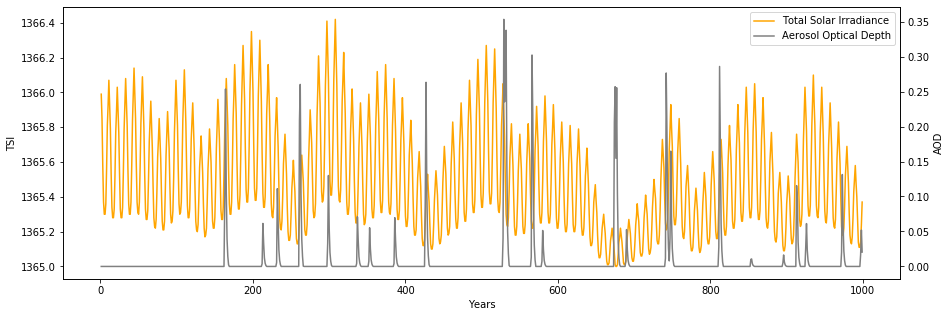

In [6]:
fig, ax1 = plt.subplots(figsize=(15, 5))

solr_plot, = ax1.plot(solr_df.time, solr_df.TSI, c='orange')

ax2 = ax1.twinx()
volc_plot, = ax2.plot(volc_df.time, volc_df.AOD, c='gray')

plt.legend([solr_plot, volc_plot], ['Total Solar Irradiance', 'Aerosol Optical Depth'])

ax1.set_xlabel('Years')
ax1.set_ylabel('TSI')
ax2.set_ylabel('AOD')

In [7]:
r1_df = load_geodata_as_df(r1_file)
r1_df.head(5)

,lat,lon,time,T2m
0,88.572169,0.0,1,255.273010
1,88.572169,0.0,2,253.888702
2,88.572169,0.0,3,253.739990
3,88.572169,0.0,4,253.492477
4,88.572169,0.0,5,255.336472


In [8]:
# Get geodata for the very first year
y1_df = r1_df.loc[r1_df.time == 1]
y1_df.head(10)

,lat,lon,time,T2m
0,88.572169,0.000,1,255.273010
999,88.572169,1.875,1,255.286041
1998,88.572169,3.750,1,255.299057
2997,88.572169,5.625,1,255.304916
3996,88.572169,7.500,1,255.279526
4995,88.572169,9.375,1,255.273666
5994,88.572169,11.250,1,255.267151
6993,88.572169,13.125,1,255.265198
7992,88.572169,15.000,1,255.258698
8991,88.572169,16.875,1,255.264557


Text(0, 0.5, '2m Temperature, K')

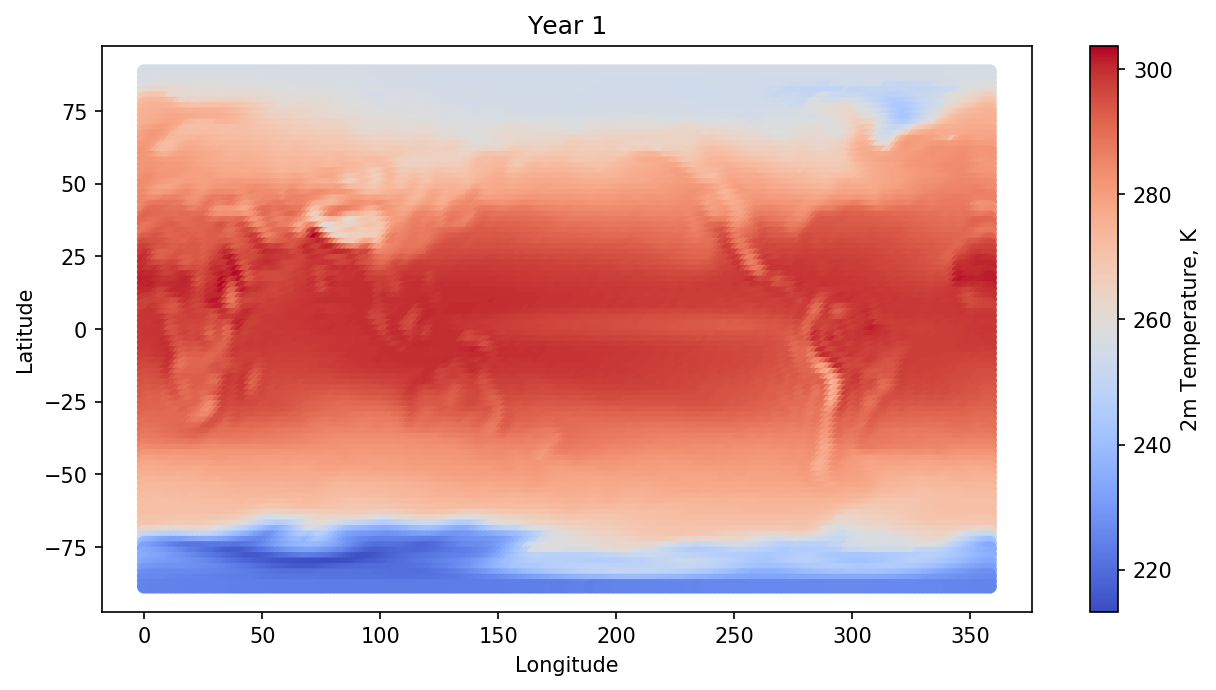

In [9]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=150)
plot = plt.scatter(y1_df.lon, y1_df.lat, c=y1_df.T2m, cmap='coolwarm')
ax.set_title('Year 1')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
cb = plt.colorbar(plot)
cb.ax.set_ylabel('2m Temperature, K')